In [44]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [45]:
df = pd.read_csv('japan/glassdoor_webscraped.csv')
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [46]:
df.shape

(438, 17)

・日本
positive

モノグラム
office (15-20)
 
バイグラム
business strength (under N near 10)
easy work(ing) (over 5)
gap expectation (under 5)
 
トリグラム  
working woman think (over 5)
holiday diverse work (under 5)
play active role (near 5)
 
negative

モノグラム
salary (over 8)
office (over 8)
sale (over 8)
incentive (over 8)
 
バイグラム
office environment (No1)
ease working (under 8)
number people (under N near 4)
remote work (under 4)
 
トリグラム
annual salary bonus (on 4)
guidance superior seniors (near 4)
purchasing company stock (under 4)


In [47]:
df.drop_duplicates(inplace = True)

In [48]:
df.shape

(437, 17)

In [49]:
df.isna().sum()

タイトル                   53
タイトルリンク                53
w-440                 362
article_answer        362
ml-5                  362
button                362
button1               362
button2               362
article_asideRight    362
button3               362
typography-hy          76
point                 191
w-100                  76
口コミ投稿日                 76
text-center            76
report                 76
report1                76
dtype: int64

In [50]:
df.columns

Index(['タイトル', 'タイトルリンク', 'w-440', 'article_answer', 'ml-5', 'button',
       'button1', 'button2', 'article_asideRight', 'button3', 'typography-hy',
       'point', 'w-100', '口コミ投稿日', 'text-center', 'report', 'report1'],
      dtype='object')

In [51]:
df.drop(columns = ['タイトルリンク', 'button',
       'button1', 'button3', 'typography-hy',
       'point', 'w-100', '口コミ投稿日', 'text-center', 'report', 'report1', 'button2'], inplace = True)

In [52]:
df.head(2)

,タイトル,w-440,article_answer,ml-5,article_asideRight
0,エンジニア、在籍5～10年、現職（回答時）、中途入社、男性、セールスフォース・ジャパン（旧：...,入社理由と入社後ギャップ,入社を決めた理由：\n業務内容と自身のやりたいことがマッチしたためです。\n常々カスタマーフ...,5.0,2022年05月10日
1,AE、在籍5～10年、現職（回答時）、中途入社、男性、セールスフォース・ジャパン（旧：セール...,入社理由と入社後ギャップ,入社を決めた理由：\n優秀な営業が多くSaaS TOPの企業であり、ソリューションが面白いた...,3.9,2022年05月04日


In [53]:
df.rename(columns = {'タイトル':'title', 'w-440':'topic', 'ml-5':'rating', 'article_asideRight': 'dates'}
          , inplace = True)

In [54]:
df.isna().sum()

title              53
topic             362
article_answer    362
rating            362
dates             362
dtype: int64

# Pros

In [55]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [56]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

### Tokenization

In [57]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

### Removing special chars

In [58]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Pros']=df['Pros'].apply(remove_special_characters)

KeyError: 'Pros'

### Text stemming 

In [ ]:
# #Stemming the text
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
# #Apply function on review column
# df['Pros']=df['Pros'].apply(simple_stemmer)

### Text Lemmatizing

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['Pros']=df['Pros'].apply(lemmatize_text)


### Removing stopwords

In [1]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Pros']=df['Pros'].apply(remove_stopwords)

NameError: name 'stopwords' is not defined

In [119]:
df.head()

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons
0,Amazing!,"Aug 12, 2021",Senior Sales Recruiter,"Aug 12, 2021 - Senior Sales Recruiter",5.0,"[ ' Unparalleled ' , ' team ' , ' benefit ' , ...","-Hyper growth always means a big work load, bu..."
1,Amazing Company,"Aug 6, 2022","LMTS, Software Engineering","Aug 6, 2022 - LMTS, Software Engineering",5.0,"[ ' Work ' , ' life ' , ' balance ' , ' Respec...",May not offer salary like FAANG companies.
2,What a disappointment...,"Nov 30, 2020",Account Executive- Core Team,"in San Francisco, CA",3.0,"[ ' Benefits ' , ' ' , ' top ' , ' notch ' , '...","I came into Salesforce like every rep, excited..."
3,Great Company,"Aug 4, 2022",Operations Analyst,"Nov 30, 2020 - Account Executive- Core Team",5.0,"[ ' Company ' , ' ' , ' really ' , ' great ' ,...",There are times promotions are political
4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...


/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


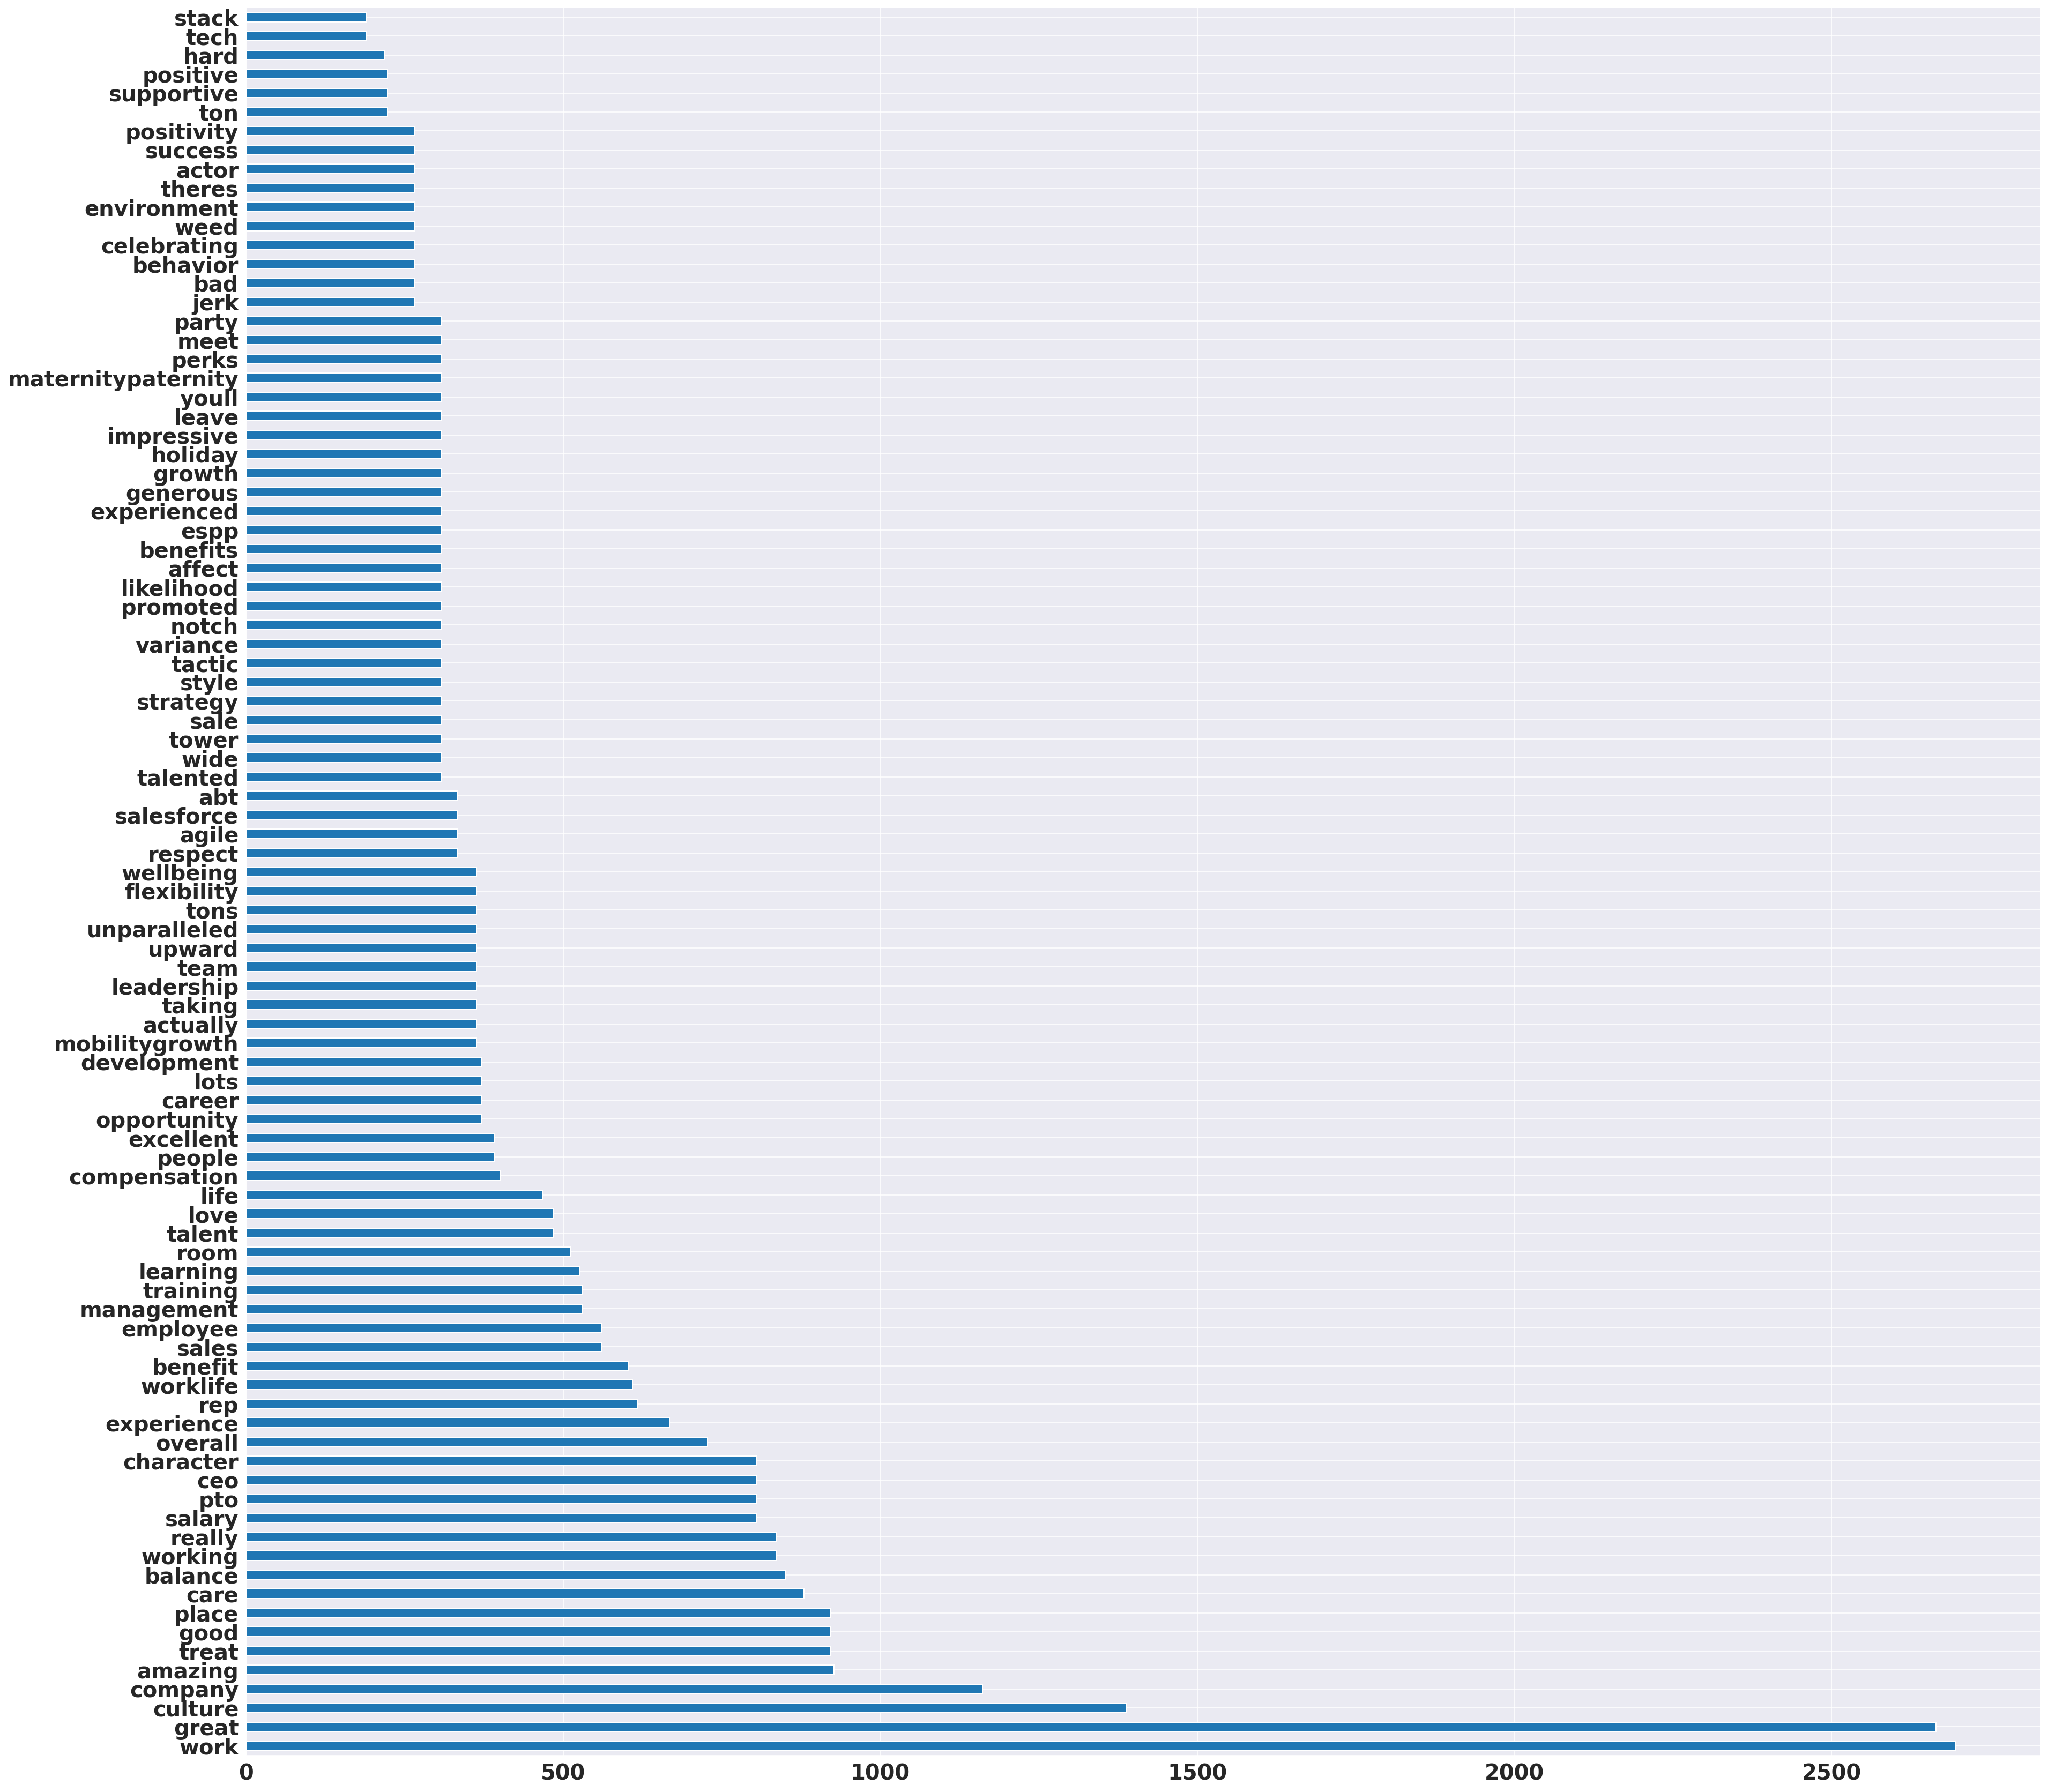

In [120]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df['Pros'])

pro_tf = tf.transform(df['Pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

### Bigram

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


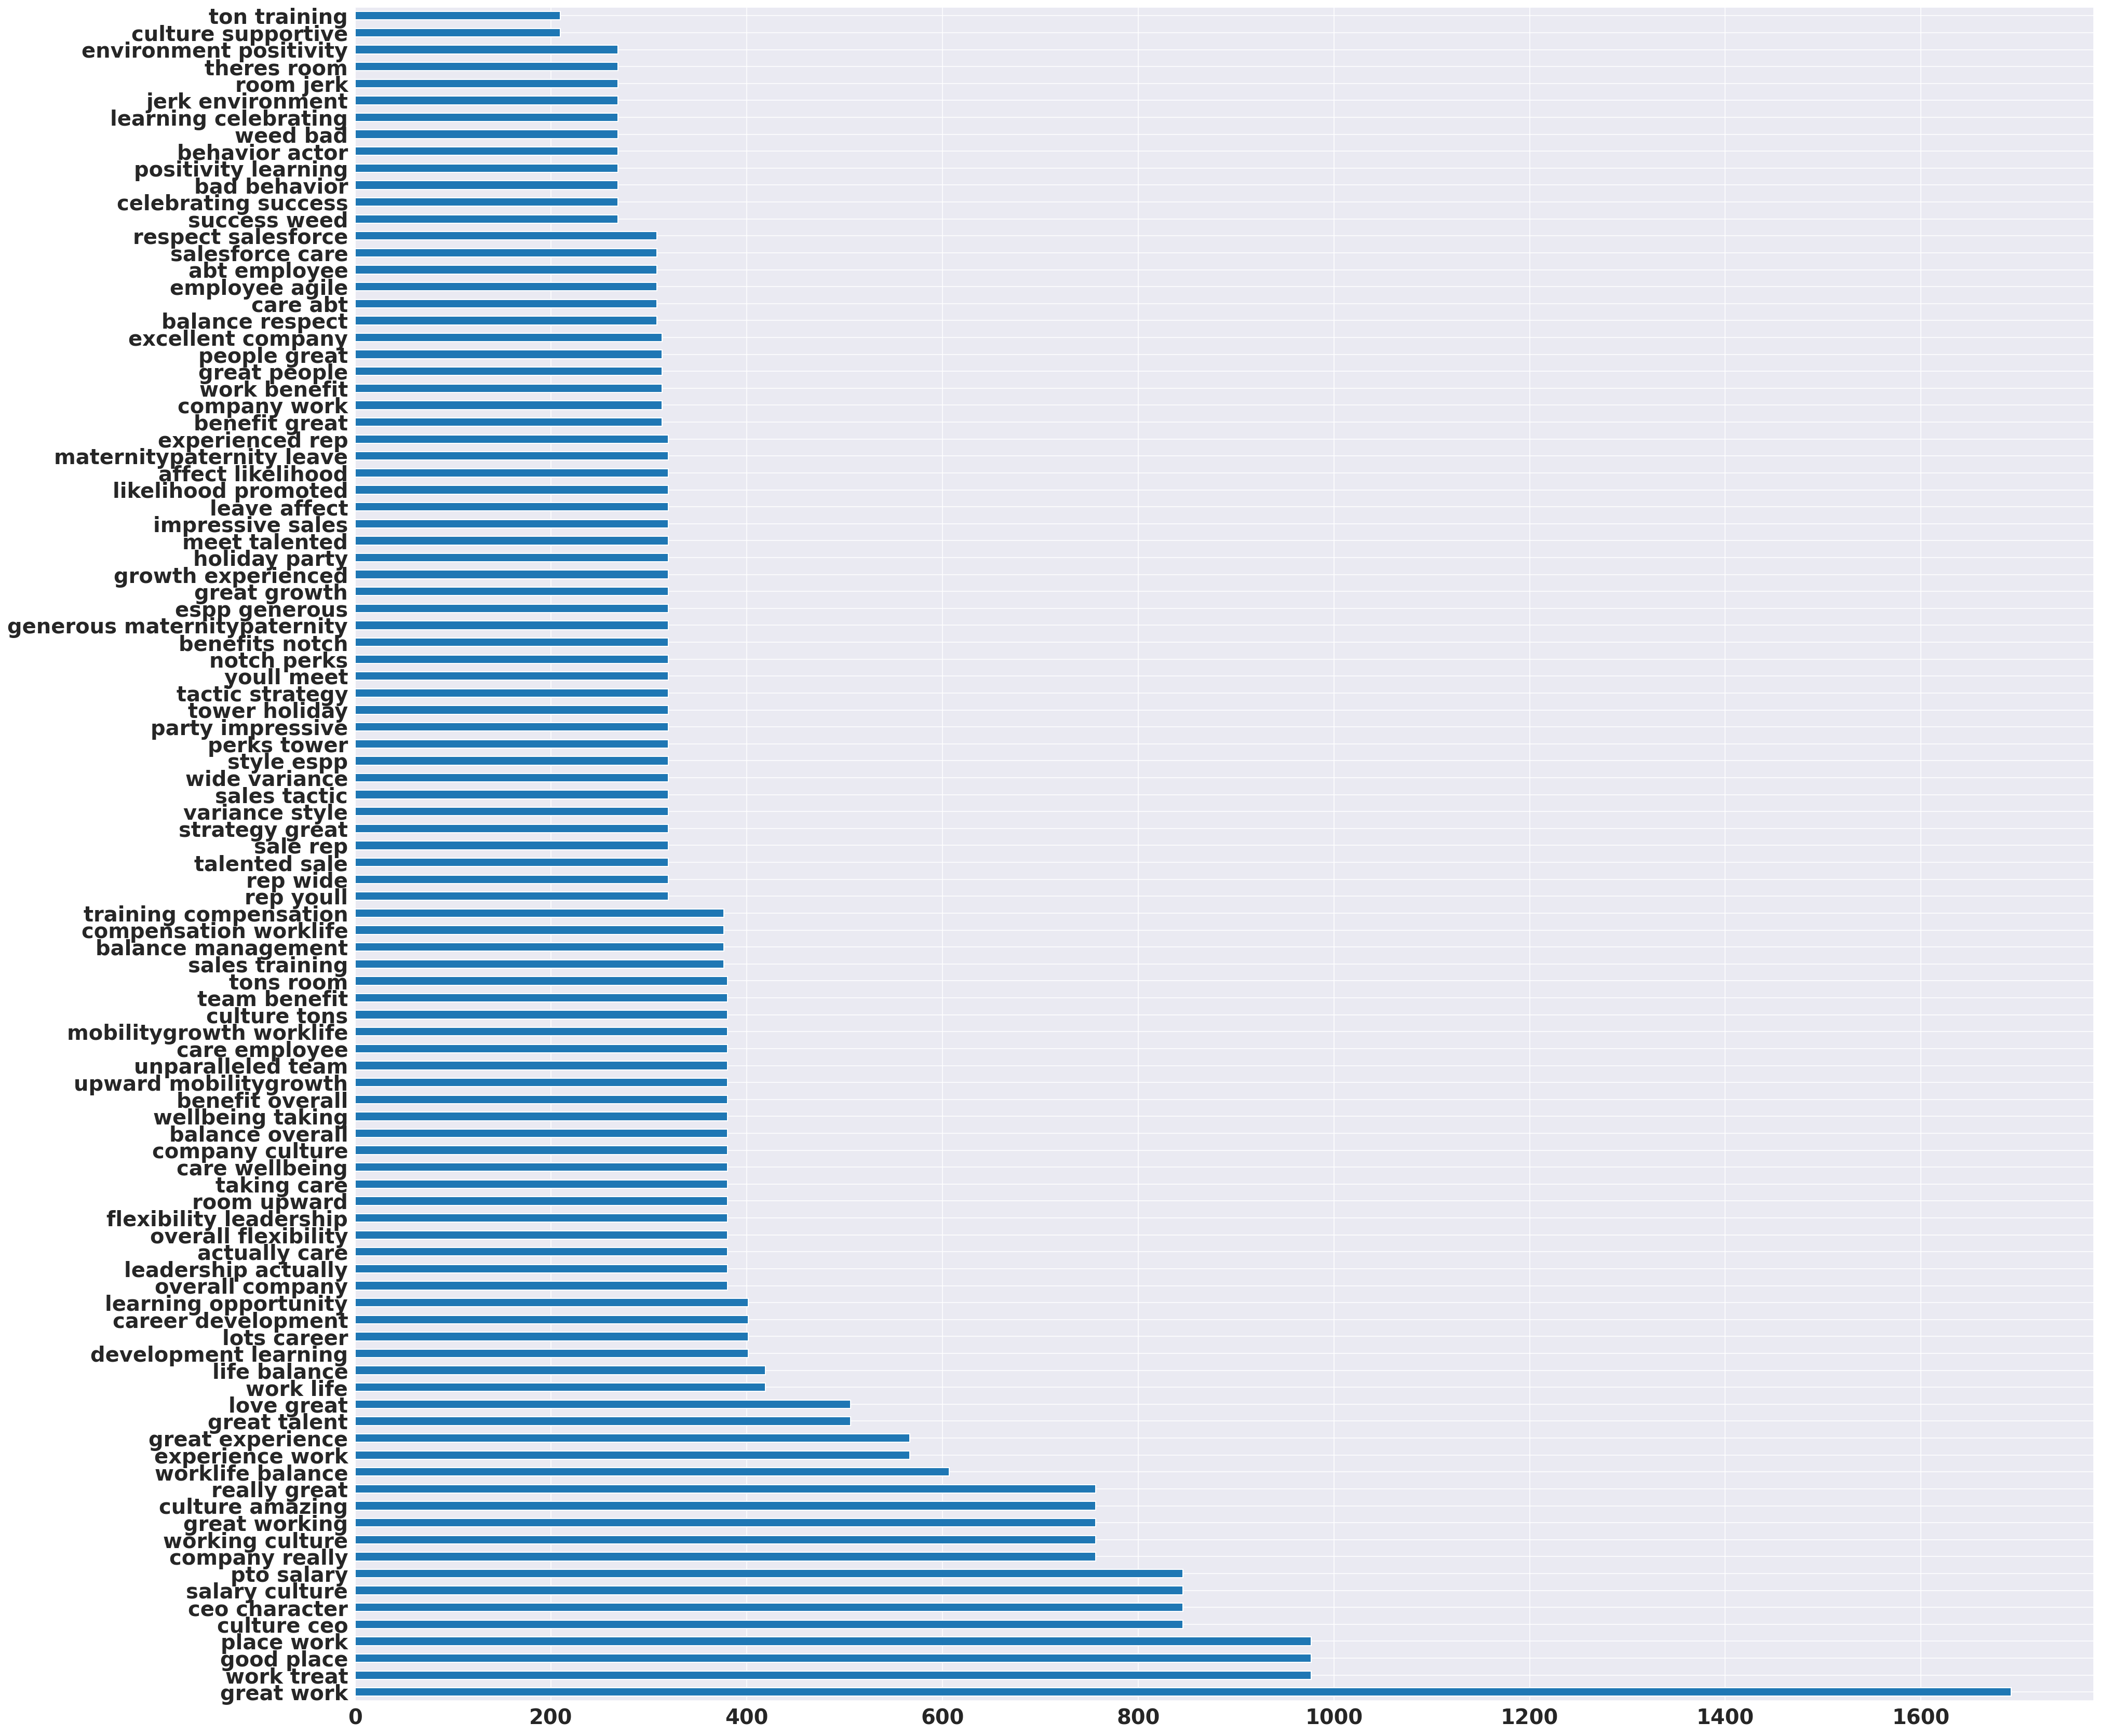

In [121]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range=(2,2))
tf.fit(df['Pros'])

pro_tf = tf.transform(df['Pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)



## Qualitative Analysis (Bigram_Pros)

- Watano-san: 
- NLP_pros
    - pto salary (Bigram 800)

In [122]:
df.shape

(16920, 7)

In [123]:
df['pto_salary'] = pro_df['pto salary']

In [124]:
df[df['pto_salary'] > 0]

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons,pto_salary
4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
14,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"Aug 4, 2022 - Operations Analyst",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
24,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"Aug 4, 2022 - Operations Analyst",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
34,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"Aug 4, 2022 - Operations Analyst",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
44,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"Aug 4, 2022 - Operations Analyst",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
...,...,...,...,...,...,...,...,...
16874,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
16884,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
16894,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5
16904,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5


## Qualitative Analysis (Trigram_Pros)

- Watano-san: 
- NLP_pros
    - culture ceo character (Trigram 1000)
    - flexibility leadership actually (Tri 400)
    - unparalleled team benefit (Tri 400)
    - maternitypaternity leave affect (Tri 300)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


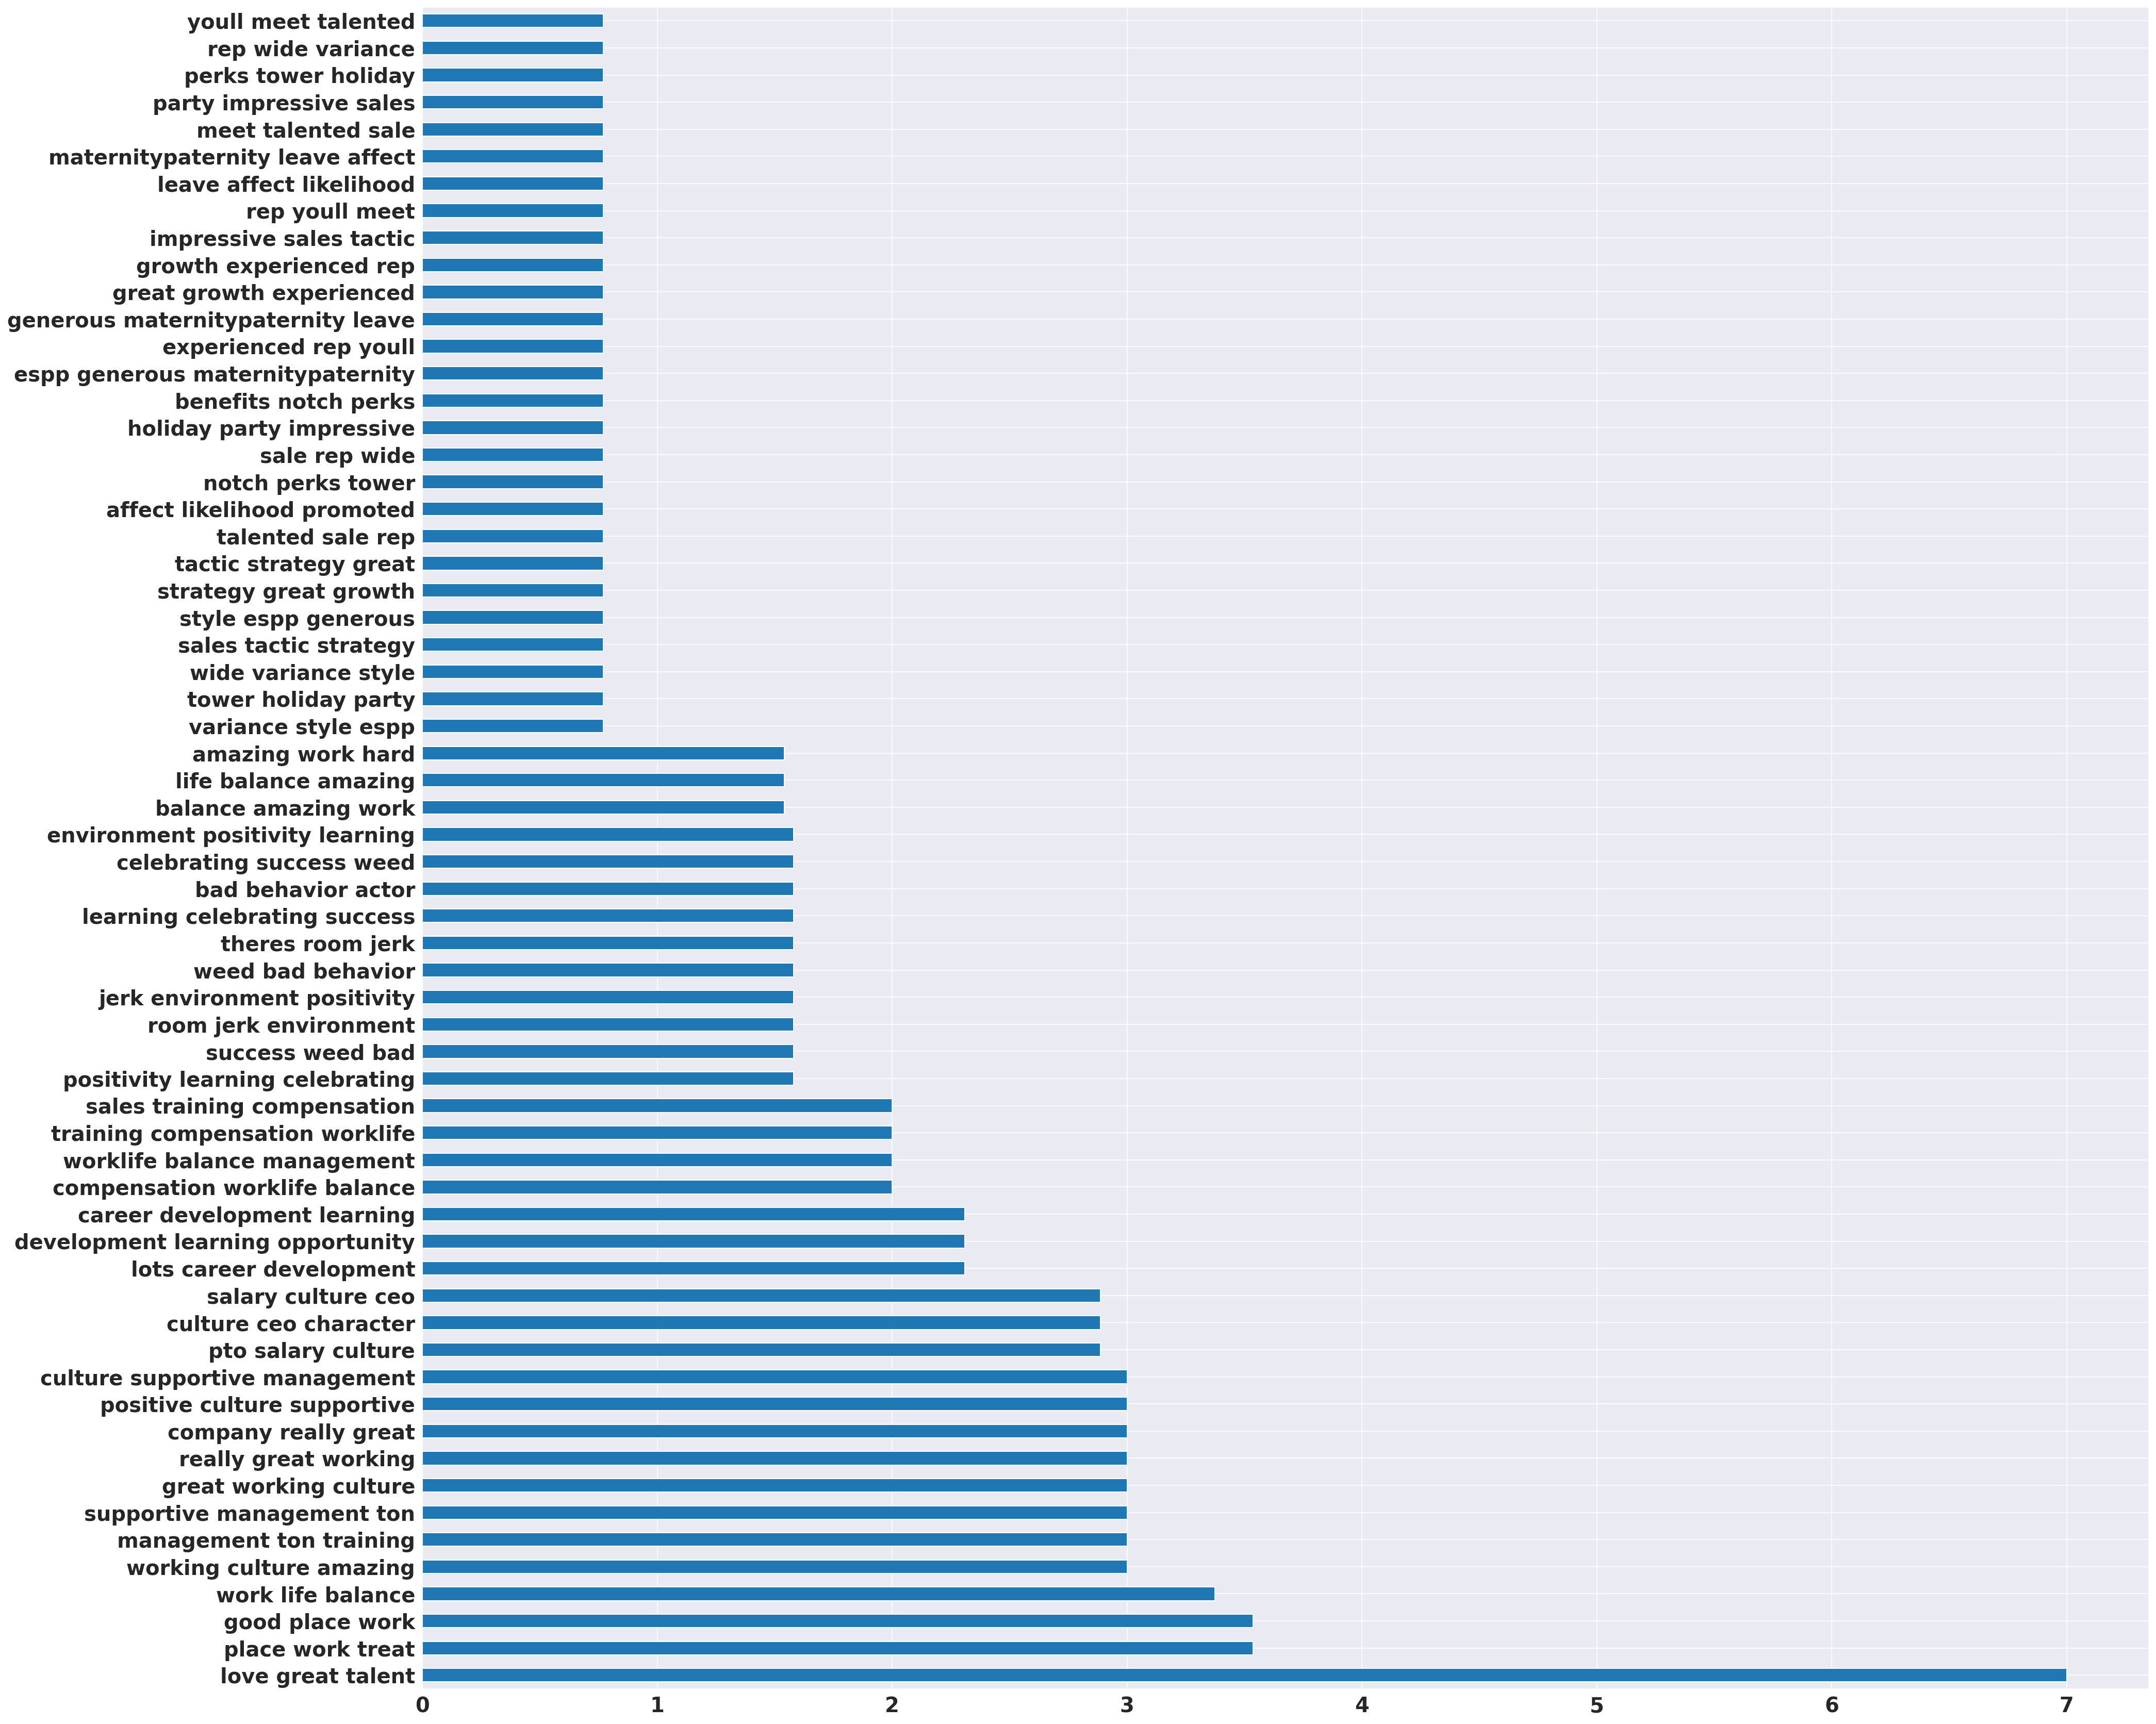

In [128]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range=(3,3))
tf.fit(df['Pros'])

pro_tf = tf.transform(df['Pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)


In [138]:
df['culture_ceo_charactor'] = pro_df['culture ceo character']
# df['flexibility_leadership_actually'] = pro_df['flexibility leadership actually']
# df['unparalleled_team_benefit'] = pro_df['unparalleled team benefit']
df['maternitypaternity_leave_affect'] = pro_df['maternitypaternity leave affect']

In [139]:
df[df['culture_ceo_charactor'] > 0]

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons,pto_salary,culture_ceo_charactor,maternitypaternity_leave_affect
4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,"[ ' PTO ' , ' Salary ' , ' Culture ' , ' CEO '...",Project teams can be very silo'd which makes i...,0.5,0.57735,0.0
13,Great Company,"Aug 4, 2022",Operations Analyst,"in San Francisco, CA",5.0,"[ ' Company ' , ' ' , ' really ' , ' great ' ,...",There are times promotions are political,0.0,0.57735,0.0


In [140]:
df[df['maternitypaternity_leave_affect'] >0]

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons,pto_salary,culture_ceo_charactor,maternitypaternity_leave_affect
2,What a disappointment...,"Nov 30, 2020",Account Executive- Core Team,"in San Francisco, CA",3.0,"[ ' Benefits ' , ' ' , ' top ' , ' notch ' , '...","I came into Salesforce like every rep, excited...",0.0,0.0,0.19245
11,Great,"Aug 5, 2022",Sales Associate,"Aug 5, 2022 - Sales Associate",5.0,"[ ' ' , ' ' , ' great ' , ' ' , ' work ' , ' ' ]",don’t have any at all,0.0,0.0,0.19245
47,Differentiator = environment,"Aug 3, 2022",Regional Sales Manager,"in New York, NY",5.0,"[ ' Theres ' , ' ' , ' room ' , ' ' , ' ' , ' ...",Experiencing growing pains transitioning from ...,0.0,0.0,0.19245
